## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Learning Outcomes
1. Understand text preprocessing techniques like tokenization, stopword removal, and stemming/lemmatization.
2. Explore feature extraction methods such as Bag of Words, TF-IDF, and word embeddings.
3. Learn to use NLP libraries like NLTK, spaCy, and Hugging Face Transformers.
4. Experiment with NLP-specific models such as LSTM, BERT, or other transformer-based models.
5. Gain experience in deploying NLP models via APIs.


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


**Natural Language Processing (NLP) significantly enhances the media industry by automating the categorization of news content, enabling faster, more accurate content organization and distribution. By analyzing the text of articles, NLP models can classify news stories into predefined categories—such as politics, sports, technology, or entertainment—without manual intervention. This not only streamlines editorial workflows but also improves user experience through better content recommendations, personalized news feeds, and efficient archiving. Ultimately, NLP empowers media outlets to manage vast volumes of information with greater efficiency and relevance.**

## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


In [1]:
# Install Kaggle API and required libraries
!pip install -q kaggle

# Create a Kaggle folder if it doesn't exist
import os
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Inform user to upload kaggle.json
print("✅ Kaggle API setup complete. Please upload your kaggle.json file to proceed.")


✅ Kaggle API setup complete. Please upload your kaggle.json file to proceed.


In [2]:
from google.colab import files
import os
import shutil

# Step 1: Upload the kaggle.json file
uploaded = files.upload()  # Will open a file upload dialog

# Step 2: Move it to the correct location and set permissions
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

print("✅ kaggle.json uploaded and configured!")


Saving kaggle.json to kaggle.json
✅ kaggle.json uploaded and configured!


In [3]:
!kaggle datasets download -d ankurzing/sentiment-analysis-for-financial-news

import zipfile

with zipfile.ZipFile("sentiment-analysis-for-financial-news.zip", "r") as zip_ref:
    zip_ref.extractall("financial_sentiment")


Dataset URL: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news
License(s): CC-BY-NC-SA-4.0
  0% 0.00/903k [00:00<?, ?B/s]
100% 903k/903k [00:00<00:00, 1.03GB/s]


In [4]:
import os
os.listdir("financial_sentiment")


['FinancialPhraseBank', 'all-data.csv']

In [5]:
import pandas as pd

file_path = "financial_sentiment/all-data.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)

df.head()


,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [6]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [7]:
df['sentiment'].value_counts()


,count
sentiment,
neutral,2879
positive,1363
negative,604


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

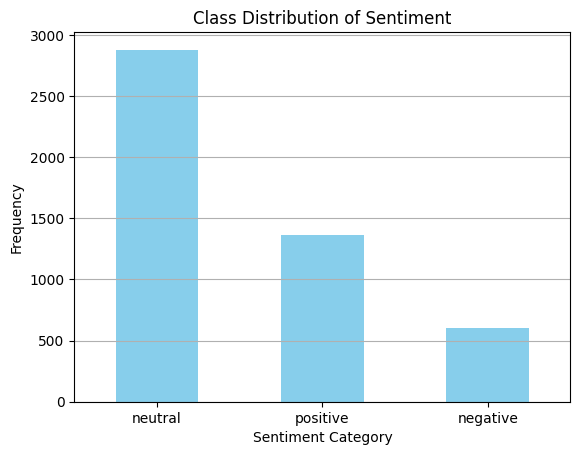

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [8]:
# Plot sentiment distribution
import pandas as pd
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution of Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


df.head()

## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [9]:
 !pip install -U spacy
 !python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 127.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")  # ✅ This defines 'nlp'


In [11]:
# Sample 5 rows
sample_df = df.sample(5, random_state=42).copy()

def preprocess_text(text):
    doc = nlp(text.lower())  # Lowercasing and NLP parsing

    cleaned_tokens = []
    for token in doc:
        # Filter out punctuation, spaces, and stopwords
        if token.is_alpha and not token.is_stop:
            cleaned_tokens.append(token.lemma_)  # Lemmatized form

    return " ".join(cleaned_tokens)

# Apply to sample
sample_df['cleaned_text'] = sample_df['text'].apply(preprocess_text)

# View before and after
print(sample_df[['text', 'cleaned_text']])


                                                   text  \
3207  The company was supposed to deliver machinery ...   
1684  UNC Charlotte would also deploy SSH Tectia Con...   
1044  In 2009 , Lee & Man had a combined annual prod...   
4145  `` That 's a very high figure on the European ...   
1538  In Finland , the corresponding service is Alma...   

                                           cleaned_text  
3207  company suppose deliver machinery veneer mill ...  
1684  unc charlotte deploy ssh tectia connector enab...  
1044  lee man combine annual production capacity clo...  
4145  high figure european scale noop say recall inc...  
1538  finland correspond service alma medium finland...  


In [12]:
df['sentiment'] = df['sentiment'].astype('category')
print(df['sentiment'].dtypes)

category


In [13]:
# using the preprocess function created eailer
import time

start = time.time()
df['cleaned_text'] = df['text'].apply(preprocess_text)
end = time.time()

print(f"✅ Preprocessing complete! Took {round(end - start, 2)} seconds")


✅ Preprocessing complete! Took 37.9 seconds


In [14]:
df[['sentiment', 'text', 'cleaned_text']].head()


,sentiment,text,cleaned_text
0,neutral,"According to Gran , the company has no plans t...",accord gran company plan production russia com...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area square met...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company increase capacity...
4,positive,According to the company 's updated strategy f...,accord company update strategy year basware ta...


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['sentiment'])

# Check mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [16]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['cleaned_text']
y = df['label']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


Train samples: 3876
Test samples: 970


In [17]:
df.head()

,sentiment,text,cleaned_text,label
0,neutral,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,1
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area square met...,1
2,negative,The international electronic industry company ...,international electronic industry company elco...,0
3,positive,With the new production plant the company woul...,new production plant company increase capacity...,2
4,positive,According to the company 's updated strategy f...,accord company update strategy year basware ta...,2


### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

### 1. Bag of words (BOW)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Create BoW features
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit vocabulary to top 5000 words
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

print("BoW shape:", X_bow.shape)  # (rows, features)


BoW shape: (4846, 5000)


### 2. TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF shape:", X_tfidf.shape)


TF-IDF shape: (4846, 5000)


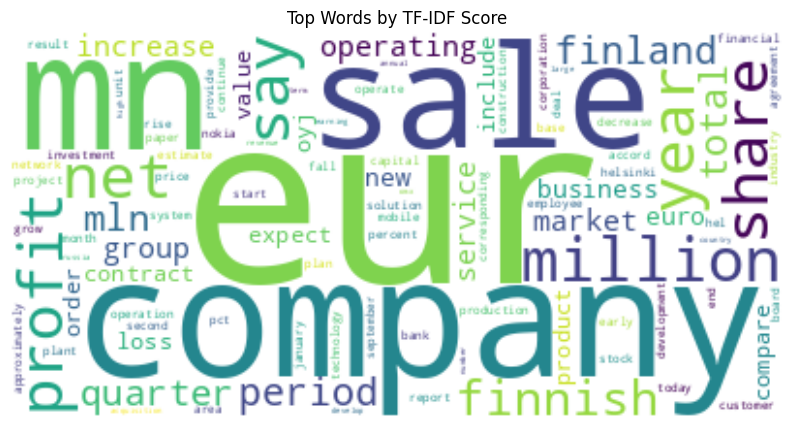

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Sum the TF-IDF scores for each word across all documents
sum_words = X_tfidf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Generate WordCloud
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top Words by TF-IDF Score")
plt.show()


In [ ]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 49329 stored elements and shape (4846, 5000)>

### Load GloVe vectors into memory

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip



--2025-06-15 15:45:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-15 15:45:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-15 15:45:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
ERROR: cannot verify downloads.cs.stanford.edu's certificate, issued by ‘CN=InCommon RSA Server CA 2,O=Internet2,C=US’:
 

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2025-06-15 15:47:12--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-15 15:47:12--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-15 15:47:12--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
ERROR: cannot verify downloads.cs.stanford.edu's certificate, issued by ‘CN=InCommon RSA Server CA 2,O=Internet2,C=US’:
 

In [25]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip


--2025-06-29 16:45:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-29 16:45:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-29 16:45:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [26]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [27]:
import numpy as np

embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print("Loaded word vectors:", len(embedding_index))


Loaded word vectors: 400000


### Prepare Tokenizer + Sequences

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])

X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])
X_pad = pad_sequences(X_seq, maxlen=100)  # pad to max 100 tokens


### Build Embedding Matrix

In [28]:
word_index = tokenizer.word_index
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    vector = embedding_index.get(word)
    if vector is not None:
        embedding_matrix[i] = vector

print("Embedding matrix shape:", embedding_matrix.shape)


Embedding matrix shape: (7190, 100)


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [29]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7371134020618557

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.49      0.58       121
           1       0.75      0.92      0.82       576
           2       0.71      0.47      0.56       273

    accuracy                           0.74       970
   macro avg       0.73      0.62      0.66       970
weighted avg       0.73      0.74      0.72       970



In [31]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [32]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7298969072164948

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.69      0.62       121
           1       0.81      0.80      0.80       576
           2       0.64      0.61      0.63       273

    accuracy                           0.73       970
   macro avg       0.67      0.70      0.68       970
weighted avg       0.73      0.73      0.73       970



In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
b_y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, b_y_pred))
print("\nClassification Report:\n", classification_report(y_test, b_y_pred))


Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.7298969072164948

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.69      0.62       121
           1       0.81      0.80      0.80       576
           2       0.64      0.61      0.63       273

    accuracy                           0.73       970
   macro avg       0.67      0.70      0.68       970
weighted avg       0.73      0.73      0.73       970



In [34]:
df.head()

,sentiment,text,cleaned_text,label
0,neutral,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,1
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area square met...,1
2,negative,The international electronic industry company ...,international electronic industry company elco...,0
3,positive,With the new production plant the company woul...,new production plant company increase capacity...,2
4,positive,According to the company 's updated strategy f...,accord company update strategy year basware ta...,2


In [35]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Pad sequences
maxlen = 100
X = pad_sequences(sequences, maxlen=maxlen)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
import numpy as np

embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [37]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=maxlen,
                    trainable=False))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 sentiment classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │       719,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 719,100 (2.74 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 719,100 (2.74 MB)

In [38]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5618 - loss: 0.9318 - val_accuracy: 0.6732 - val_loss: 0.7736
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6836 - loss: 0.7319 - val_accuracy: 0.6876 - val_loss: 0.6864
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7033 - loss: 0.6693 - val_accuracy: 0.7155 - val_loss: 0.6516
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7372 - loss: 0.5971 - val_accuracy: 0.7216 - val_loss: 0.6321
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7662 - loss: 0.5522 - val_accuracy: 0.7371 - val_loss: 0.6319
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7744 - loss: 0.5555 - val_accuracy: 0.7402 - val_loss: 0.6089
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7797 - loss: 0.5454 - val_accuracy: 0.7485 - val_loss: 0.6012
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7974 - loss: 0.4981 - val_accuracy: 0

### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.

In [39]:
import pandas as pd
from datasets import Dataset

# Make sure your dataframe has 'text' and 'label' columns
df['label'] = y
hf_dataset = Dataset.from_pandas(df[['cleaned_text', 'label']].rename(columns={'cleaned_text': 'text'}))
hf_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 4846
})

In [40]:
from transformers import BertTokenizerFast, BertForSequenceClassification

model_name = "bert-base-uncased"
tokenizer = BertTokenizerFast.from_pretrained(model_name)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

tokenized_ds = hf_dataset.map(tokenize, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/4846 [00:00<?, ? examples/s]

In [41]:
split_ds = tokenized_ds.train_test_split(test_size=0.2)

In [ ]:
# Remove old transformers version if it exists
!pip uninstall -y transformers

# Install the latest stable version
!pip install transformers datasets --upgrade --quiet



Found existing installation: transformers 4.52.4
Uninstalling transformers-4.52.4:
  Successfully uninstalled transformers-4.52.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is inc

In [42]:
import transformers
print(transformers.__version__)


4.52.4


In [43]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./bert-sentiment",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_ds["train"],
    eval_dataset=split_ds["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()


/tmp/ipython-input-44-1560882152.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3digitalmary (3digitalmary-kaggle) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.498530,0.788660,0.787103,0.786719,0.788660
2,No log,0.482153,0.798969,0.798818,0.799997,0.798969
3,0.553800,0.536792,0.794845,0.797465,0.802914,0.794845


TrainOutput(global_step=729, training_loss=0.4699475428368002, metrics={'train_runtime': 209.299, 'train_samples_per_second': 55.557, 'train_steps_per_second': 3.483, 'total_flos': 370003243680000.0, 'train_loss': 0.4699475428368002, 'epoch': 3.0})